##### 데이터셋 링크 : https://www.kaggle.com/competitions/playground-series-s4e2/data
- 참고자료 : https://www.kaggle.com/code/christina0626/feature-engineering-model-combined
- 참고자료 : https://www.kaggle.com/code/thomasmeiner/ps4e2-eda-feature-engineering-modelling


In [136]:
# Matplotlib에서 기본 폰트로 변경
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1.Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../dataset/240225_Multi-Class Prediction of Obesity Risk/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
null_counts = df.isnull().sum()
print(null_counts)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [5]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
import warnings

# 경고 메시지를 무시하도록 설정
warnings.filterwarnings("ignore")

# 코드 실행
# 이후에 발생하는 경고 메시지들은 출력되지 않습니다.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >, <Axes: >]],
      dtype=object)

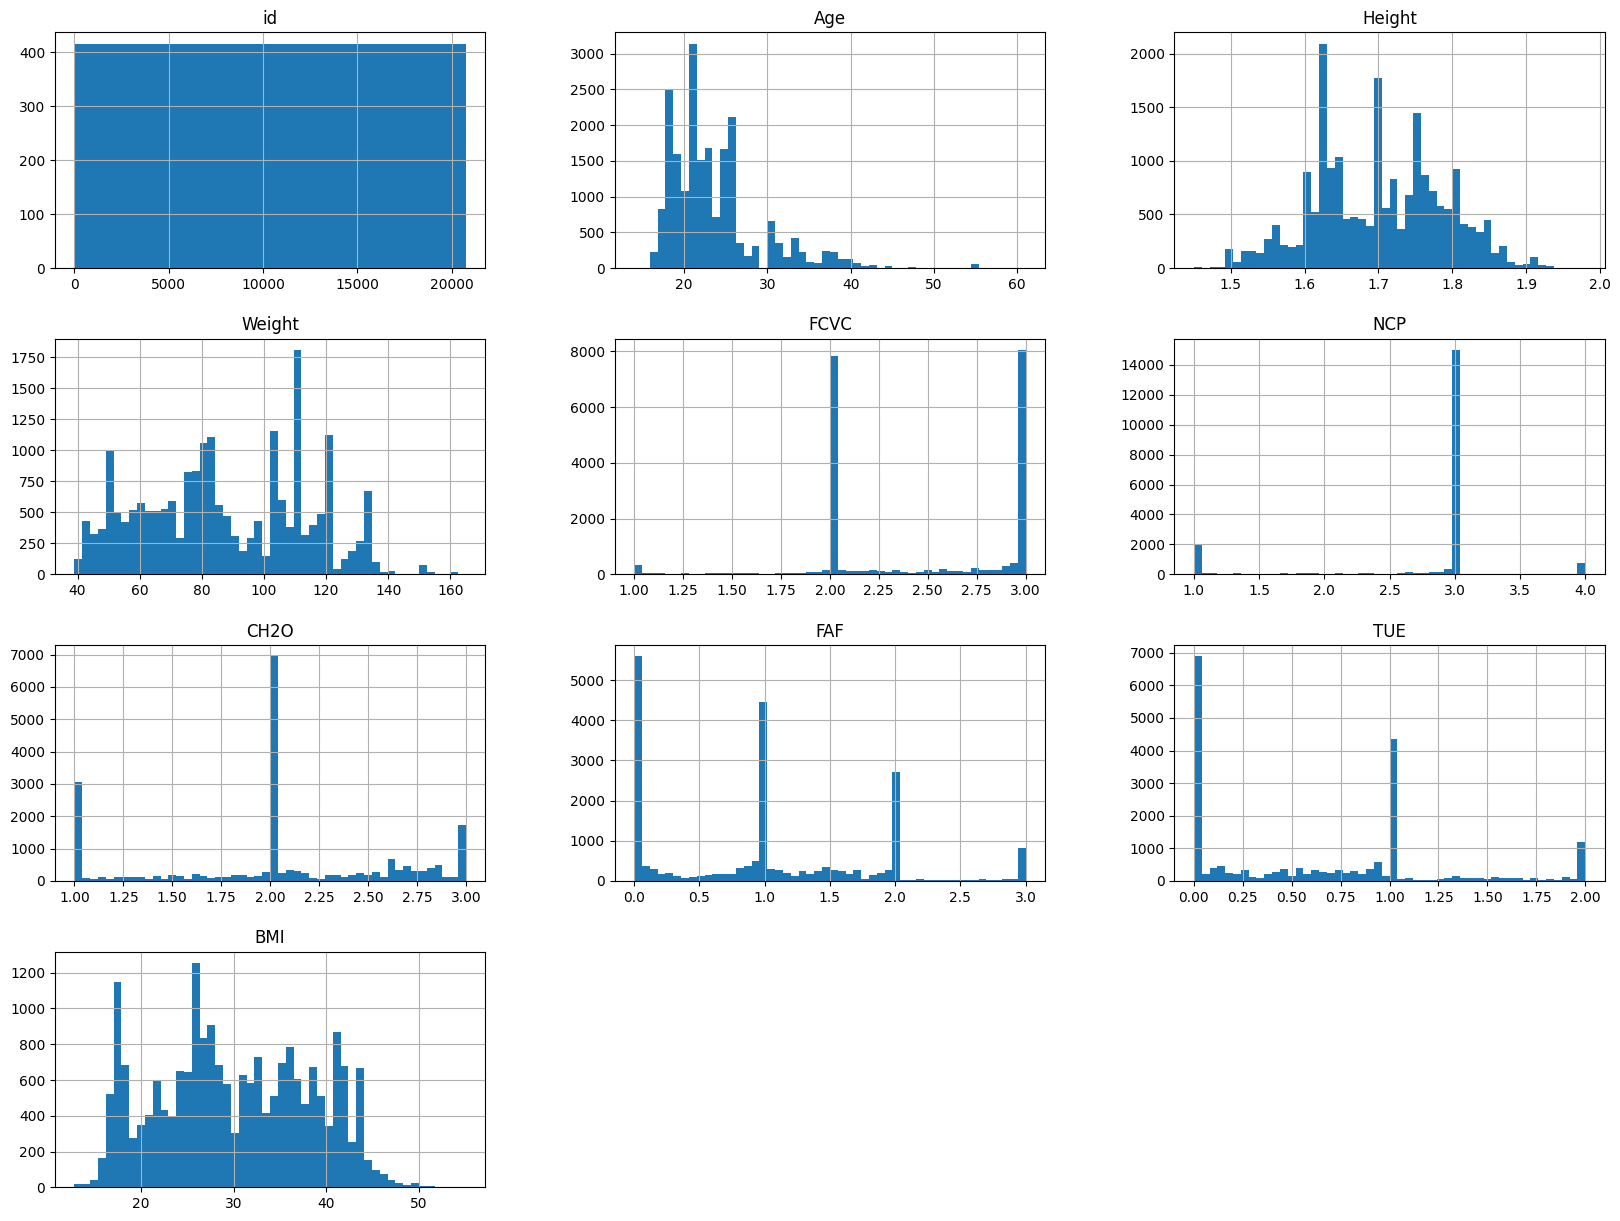

In [149]:
df.hist(bins=50,figsize=(20,15))

In [8]:
df.value_counts()

id     Gender  Age        Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24.443011  1.699998  81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21.012569  1.697421  100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16.496978  1.691206  82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21.024970  1.735810  131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612 

In [9]:
df['Age'].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

# * 각 칼럼에 대한 설명

### **Gender**: 
- categorical variable that shows the biological sex of the individual (male or female).
### **Age**: 
- numerical variable that shows the individual’s age in years.
### **Height**: 
- numerical variable that shows the individuals’ height in meters.
### **Weight**: 
- numerical variable that shows the individuals’ weight in kilograms.
### **Family history of overweight**: 
- categorical variable that shows if the individual has a family member who is overweight or obese (yes or no).
### **FAVC**  고칼로리 음식을 자주 섭취하는가?  -> yes/ no Frequently consumed high-calorie food (FAVC): 
- categorical variable that shows if the individual often eats high-calorie food 
- (yes or no).         
### **FCVC**  야채를 자주 섭취하는가? -> 빈도 Frequency of consumption of vegetables (FCVC): 
- ordinal variable that shows how often the individual eats vegetables 
- (1 = never, 2 = sometimes, 3 = always).
### **NCP** 메인 식사를 하루에 몇번 가지는가? -> 횟수 Number of main meals (NCP): 
 - ordinal variable that shows how many main meals the individual has daily 
 - (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).                        
### **CAEC**  식사와 식사 사이에 몇번 먹는가? -> 빈도 Consumption of food between meals (CAEC): 
 - ordinal variable that shows how often the individual eats food between meals 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **SMOKE**  흡연 유무                        
 ### **CH2O** 물을 얼마나 마시는가? Consumption of water daily (CH2O): 
 - ordinal variable that shows how much water the individual drinks daily 
 - (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).                         
 ### **SCC** 칼로리를 확인하는가? -> yes / no Monitor calorie intake (SCC): 
 - categorical variable that shows if the individual keeps track of their caloric intake 
 - (yes or no).
 ### **FAF** 신체활동을 몇 번 하는가? -> 횟수 Frequency of physical activity (FAF): 
 - ordinal variable that shows how often the individual does physical activity 
 - (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).                           
 ### **TUE** 전자기기를 몇시간이나 사용하는가? Time using electronic devices (TUE): 
 - ordinal variable that shows how long the individual uses electronic devices 
 - (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
 ### **CALC** 술은 얼마나 마시는가? Consumption of alcohol (CALC): 
 - ordinal variable that shows how often the individual drinks alcohol 
 - (1 = no, 2 = sometimes, 3 = frequently, 4 = always).
 ### **MTRANS** 교통수단은 뭘 이용하는가? Type of transportation used (MTRANS): 
 - categorical variable that shows what kind of transportation the individual uses 
 - (automobile, motorbike, bike, public transportation, walking).
 ### **NObeyesdad** : 비만유형

# EDA

In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [11]:
df['FAVC'].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [12]:
df['FCVC'].value_counts()
# (1 = never, 2 = sometimes, 3 = always).

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [13]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['FCVC'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)


정수로 표시된 값들의 비율: 0.7508430484632431
소수점으로 나와있는 값들의 비율: 0.24915695153675688


In [14]:
df['NCP'].value_counts()
# (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer).  

NCP
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

In [15]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['NCP'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)


정수로 표시된 값들의 비율: 0.8386164370363234
소수점으로 나와있는 값들의 비율: 0.16138356296367662


In [16]:
df['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [17]:
df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [18]:
#(1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L).   
df['CH2O'].value_counts()

CH2O
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [19]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['CH2O'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5292417381250603
소수점으로 나와있는 값들의 비율: 0.47075826187493974


In [20]:
df['SCC'].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

In [21]:
#(1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week).   
df['FAF'].value_counts()

FAF
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [22]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['FAF'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5940842084979285
소수점으로 나와있는 값들의 비율: 0.40591579150207147


In [23]:
# (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours).
df['TUE'].value_counts()

TUE
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [24]:
# 정수로 표시된 값들의 비율 계산
integer_count = df['TUE'].apply(lambda x: x.is_integer()).sum()
total_count = len(df)
integer_ratio = integer_count / total_count

# 소수점으로 나와있는 값들의 비율 계산
decimal_ratio = 1 - integer_ratio

print("정수로 표시된 값들의 비율:", integer_ratio)
print("소수점으로 나와있는 값들의 비율:", decimal_ratio)

정수로 표시된 값들의 비율: 0.5792947297427498
소수점으로 나와있는 값들의 비율: 0.42070527025725024


In [25]:
df['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [26]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [27]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

# 상관관계 분석

In [28]:
df['Age'].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

In [29]:
# Age 열을 소수점 이하 자릿수를 제거하여 정수로 변환
df['Age'] = df['Age'].astype(int)

<Axes: >

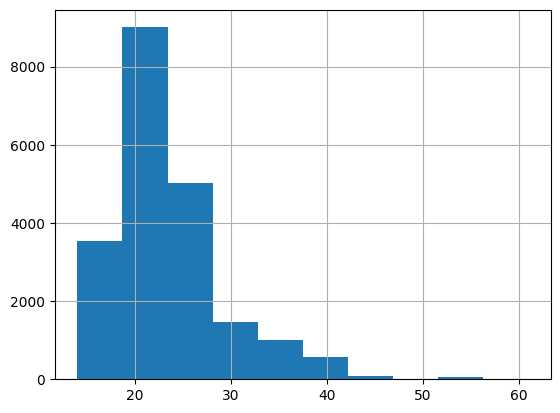

In [148]:
df['Age'].hist()

In [31]:
df.value_counts()

id     Gender  Age  Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC       SMOKE  CH2O      SCC  FAF       TUE       CALC       MTRANS                 NObeyesdad         
0      Male    24   1.699998  81.669950   yes                             yes   2.000000  2.983297  Sometimes  no     2.763573  no   0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II    1
13826  Male    21   1.697421  100.431625  yes                             yes   2.000000  1.627555  Sometimes  no     1.000000  no   1.000000  0.460866  Sometimes  Public_Transportation  Obesity_Type_I         1
13844  Female  16   1.691206  82.000000   yes                             yes   2.668890  1.680838  Sometimes  no     1.876915  no   0.130417  1.796136  Sometimes  Public_Transportation  Obesity_Type_I         1
13843  Female  21   1.735810  131.042274  yes                             yes   3.000000  3.000000  Sometimes  no     1.650612  no   1.645532  0.912187  Some

In [32]:
df['Height'].value_counts()

Height
1.700000    1334
1.650000     782
1.600000     672
1.750000     659
1.800000     517
            ... 
1.631456       1
1.753471       1
1.782521       1
1.930416       1
1.536819       1
Name: count, Length: 1833, dtype: int64

In [33]:
df['Height'] = df['Height'].round(2)

In [34]:
df['Height'].value_counts()

Height
1.70    1775
1.75    1445
1.62    1096
1.65    1037
1.63     998
1.64     932
1.60     900
1.76     865
1.72     834
1.77     722
1.80     698
1.74     681
1.78     576
1.71     555
1.79     549
1.61     526
1.67     471
1.68     456
1.66     455
1.85     443
1.82     410
1.56     399
1.69     389
1.83     385
1.73     365
1.84     333
1.55     275
1.81     230
1.57     216
1.59     214
1.87     205
1.58     199
1.50     175
1.53     160
1.52     159
1.54     142
1.86     137
1.91     101
1.88      55
1.51      54
1.90      37
1.89      29
1.92      25
1.93      16
1.48      12
1.49       5
1.98       4
1.94       4
1.95       4
1.46       3
1.45       2
Name: count, dtype: int64

In [35]:
df['Weight'] = df['Weight'].astype(int)

In [36]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [37]:
# BMI를 계산하여 새로운 열로 추가
df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(1)

In [38]:
df['BMI'].value_counts()

BMI
41.3    477
43.4    319
27.7    315
41.8    295
29.4    293
       ... 
49.2      1
15.0      1
50.8      1
52.1      1
47.5      1
Name: count, Length: 374, dtype: int64

In [39]:
bmi_18_5 = df[df['BMI'] < 18.5]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Insufficient_Weight    2210
Normal_Weight           158
Overweight_Level_I       12
Obesity_Type_I            3
Obesity_Type_III          1
Name: count, dtype: int64


In [40]:
bmi_18_5 = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)]
print(bmi_18_5['NObeyesdad'].value_counts())


NObeyesdad
Normal_Weight          2747
Overweight_Level_I      402
Insufficient_Weight     301
Overweight_Level_II      73
Obesity_Type_I            9
Obesity_Type_II           2
Name: count, dtype: int64


In [41]:
bmi_18_5 = df[(df['BMI'] >=25.0) & (df['BMI'] <= 29.9)]
print(bmi_18_5['NObeyesdad'].value_counts())

NObeyesdad
Overweight_Level_II    2201
Overweight_Level_I     1966
Obesity_Type_I          373
Normal_Weight           172
Obesity_Type_II          35
Insufficient_Weight      11
Obesity_Type_III          3
Name: count, dtype: int64


In [42]:
#비교적 고르게 분포되어 있다. 
# 각 비만도별 횟수 계산
obesity_counts = df['NObeyesdad'].value_counts()

# 전체 행의 수 계산
total_samples = len(df)

# 각 비만도별 비율 계산
obesity_ratios = obesity_counts / total_samples

# 결과 출력
print(obesity_ratios)


NObeyesdad
Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: count, dtype: float64


In [43]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['SMOKE'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 216.3006126923555
p-value: 6.396981747148517e-44
Degrees of freedom: 6
Expected frequencies table:
[[2493.22184218 3045.62414491 2875.65420561 3209.66490028 3998.24636285
  2398.35489932 2492.23364486]
 [  29.77815782   36.37585509   34.34579439   38.33509972   47.75363715
    28.64510068   29.76635514]]


In [45]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 6423.317090815157
p-value: 0.0
Degrees of freedom: 6
Expected frequencies table:
[[ 455.05886887  555.88245496  524.85981308  585.82291165  729.7535408
   437.74390596  454.87850467]
 [2067.94113113 2526.11754504 2385.14018692 2662.17708835 3316.2464592
  1989.25609404 2067.12149533]]


In [46]:
from scipy.stats import chi2_contingency

# 'Age'와 'NObesity' 간의 관계를 카이제곱 검정으로 분석
crosstab = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 결과 출력
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)



Chi-square value: 2349.082567778232
p-value: 0.0
Degrees of freedom: 24
Expected frequencies table:
[[ 429.5347336   524.70315059  495.42056075  552.96425475  688.82185182
   413.19096252  429.36448598]
 [   3.88939204    4.75113209    4.48598131    5.00703343    6.23720975
     3.74140091    3.88785047]
 [   4.61865305    5.64196936    5.3271028     5.9458522     7.40668658
     4.44291358    4.61682243]
 [2028.1964062  2477.56691396 2339.29906542 2611.01146546 3252.50997206
  1951.02365353 2027.39252336]
 [  56.76081511   69.33683399   65.46728972   73.07139416   91.0242798
    54.60106947   56.73831776]]


In [47]:
from scipy.stats import chi2_contingency

# 변수들을 포함한 데이터프레임 준비
variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'NObeyesdad']
df_selected = df[variables]

# 각 변수들 간의 교차표 생성 및 카이제곱 검정 수행
for variable in variables[:-1]:  # 마지막 변수인 'NObeyesdad'는 타겟 변수이므로 제외
    crosstab = pd.crosstab(df_selected[variable], df_selected['NObeyesdad'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-square value for {variable} vs NObeyesdad:", chi2)
    print(f"p-value for {variable} vs NObeyesdad:", p)
    print()


Chi-square value for Gender vs NObeyesdad: 7953.767544285371
p-value for Gender vs NObeyesdad: 0.0

Chi-square value for family_history_with_overweight vs NObeyesdad: 6423.317090815157
p-value for family_history_with_overweight vs NObeyesdad: 0.0

Chi-square value for FAVC vs NObeyesdad: 1553.6297505782907
p-value for FAVC vs NObeyesdad: 0.0

Chi-square value for CAEC vs NObeyesdad: 6897.329566047414
p-value for CAEC vs NObeyesdad: 0.0

Chi-square value for SMOKE vs NObeyesdad: 216.3006126923555
p-value for SMOKE vs NObeyesdad: 6.396981747148517e-44

Chi-square value for SCC vs NObeyesdad: 1024.7984666527484
p-value for SCC vs NObeyesdad: 3.870102954479357e-218

Chi-square value for CALC vs NObeyesdad: 4013.082706081725
p-value for CALC vs NObeyesdad: 0.0



In [48]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 교차표 생성
confusion_matrix = pd.crosstab(df['SMOKE'], df['NObeyesdad'])

# Cramer's V 값 계산
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.292799
Normal_Weight          0.264919
Obesity_Type_I         0.272635
Obesity_Type_II        0.258060
Obesity_Type_III       0.231215
Overweight_Level_I     0.298534
Overweight_Level_II    0.292857
dtype: float64


In [49]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 교차표 생성
confusion_matrix = pd.crosstab(df['Gender'], df['NObeyesdad'])

# Cramer's V 값 계산
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    1.775529
Normal_Weight          1.606461
Obesity_Type_I         1.653255
Obesity_Type_II        1.564871
Obesity_Type_III       1.402082
Overweight_Level_I     1.810304
Overweight_Level_II    1.775881
dtype: float64


In [50]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 교차표 생성
confusion_matrix = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])

# Cramer's V 값 계산
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    1.595589
Normal_Weight          1.443655
Obesity_Type_I         1.485707
Obesity_Type_II        1.406280
Obesity_Type_III       1.259989
Overweight_Level_I     1.626840
Overweight_Level_II    1.595905
dtype: float64


In [51]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 교차표 생성
confusion_matrix = pd.crosstab(df['FAVC'], df['NObeyesdad'])

# Cramer's V 값 계산
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.784721
Normal_Weight          0.709999
Obesity_Type_I         0.730680
Obesity_Type_II        0.691617
Obesity_Type_III       0.619671
Overweight_Level_I     0.800090
Overweight_Level_II    0.784876
dtype: float64


In [52]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 교차표 생성
confusion_matrix = pd.crosstab(df['SCC'], df['NObeyesdad'])

# Cramer's V 값 계산
v = cramers_v(confusion_matrix)
print("Cramer's V value:", v)


Cramer's V value: NObeyesdad
Insufficient_Weight    0.637324
Normal_Weight          0.576638
Obesity_Type_I         0.593434
Obesity_Type_II        0.561709
Obesity_Type_III       0.503276
Overweight_Level_I     0.649807
Overweight_Level_II    0.637451
dtype: float64


In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cramer's V 계산 함수
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, c = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(r-1, c-1)))
    return v

# 변수들을 포함한 데이터프레임 준비
variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'NObeyesdad']
df_selected = df[variables]

# 결과를 저장할 빈 리스트 생성
results = []

# 각 변수들 간의 교차표 생성 및 카이제곱 검정 수행
for variable in variables[:-1]:  # 마지막 변수인 'NObeyesdad'는 타겟 변수이므로 제외
    crosstab = pd.crosstab(df_selected[variable], df_selected['NObeyesdad'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    v = cramers_v(crosstab)
    results.append({'Variable': variable, 'Chi-square value': chi2, 'p-value': p, "Cramer's V": v})

# 결과를 DataFrame으로 변환하여 출력
results_df = pd.DataFrame(results)
print(results_df)


                         Variable  Chi-square value        p-value  \
0                          Gender       7953.767544   0.000000e+00   
1  family_history_with_overweight       6423.317091   0.000000e+00   
2                            FAVC       1553.629751   0.000000e+00   
3                            CAEC       6897.329566   0.000000e+00   
4                           SMOKE        216.300613   6.396982e-44   
5                             SCC       1024.798467  3.870103e-218   
6                            CALC       4013.082706   0.000000e+00   

                                          Cramer's V  
0  NObeyesdad
Insufficient_Weight    1.775529
Nor...  
1  NObeyesdad
Insufficient_Weight    1.595589
Nor...  
2  NObeyesdad
Insufficient_Weight    0.784721
Nor...  
3  NObeyesdad
Insufficient_Weight    0.954600
Nor...  
4  NObeyesdad
Insufficient_Weight    0.292799
Nor...  
5  NObeyesdad
Insufficient_Weight    0.637324
Nor...  
6  NObeyesdad
Insufficient_Weight    0.891796
Nor...  

In [54]:
# 결과를 DataFrame으로 변환하여 출력
results_df = pd.DataFrame(results)
# 필요한 정보만 선택하여 출력
simple_results_df = results_df[['Variable', 'Chi-square value', "Cramer's V"]]
# 소수점 제한
simple_results_df = simple_results_df.round(2)
# 결과를 Chi-square value 값으로 정렬
simple_results_df = simple_results_df.sort_values(by='Chi-square value', ascending=False)
print(simple_results_df)


                         Variable  Chi-square value  \
0                          Gender           7953.77   
3                            CAEC           6897.33   
1  family_history_with_overweight           6423.32   
6                            CALC           4013.08   
2                            FAVC           1553.63   
5                             SCC           1024.80   
4                           SMOKE            216.30   

                                          Cramer's V  
0  NObeyesdad
Insufficient_Weight    1.775529
Nor...  
3  NObeyesdad
Insufficient_Weight    0.954600
Nor...  
1  NObeyesdad
Insufficient_Weight    1.595589
Nor...  
6  NObeyesdad
Insufficient_Weight    0.891796
Nor...  
2  NObeyesdad
Insufficient_Weight    0.784721
Nor...  
5  NObeyesdad
Insufficient_Weight    0.637324
Nor...  
4  NObeyesdad
Insufficient_Weight    0.292799
Nor...  


# 성별은 비만에 얼마나 영향을 줄까?

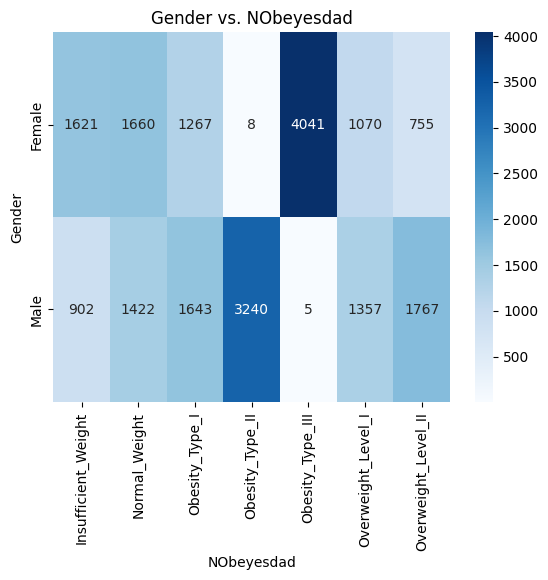

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender와 NObeyesdad 간의 교차표 생성
gender_obesity_cross = pd.crosstab(df['Gender'], df['NObeyesdad'])

# 교차표 시각화
sns.heatmap(gender_obesity_cross, annot=True, cmap='Blues', fmt='d')
plt.title('Gender vs. NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Gender')
plt.show()


In [56]:
female_data = df[df['Gender'] == 'Female']
female_counts = female_data['NObeyesdad'].value_counts()
female_ratios = female_counts / len(female_data) * 100
print(female_ratios)


NObeyesdad
Obesity_Type_III       38.773748
Normal_Weight          15.927845
Insufficient_Weight    15.553637
Obesity_Type_I         12.156976
Overweight_Level_I     10.266743
Overweight_Level_II     7.244291
Obesity_Type_II         0.076761
Name: count, dtype: float64


In [57]:
male_data = df[df['Gender'] == 'Male']
male_counts = male_data['NObeyesdad'].value_counts()
male_ratios = male_counts / len(male_data) * 100
print(male_ratios)

NObeyesdad
Obesity_Type_II        31.346749
Overweight_Level_II    17.095588
Obesity_Type_I         15.895898
Normal_Weight          13.757740
Overweight_Level_I     13.128870
Insufficient_Weight     8.726780
Obesity_Type_III        0.048375
Name: count, dtype: float64


## 성별에 따른 비만도

| NObeyesdad          | Female (%) | Male (%) |
|---------------------|------------|----------|
| Insufficient_Weight | 6.31       | 38.70    |
| Normal_Weight       | 10.52      | 34.51    |
| Overweight_Level_I  | 9.82       | 20.19    |
| Overweight_Level_II | 13.69      | 5.15     |
| Obesity_Type_I      | 16.82      | 1.28     |
| Obesity_Type_II     | 19.06      | 31.34    |
| Obesity_Type_III    | 23.77      | 0.04     |


# 가족이력은 비만도에 어떤 영향을 미칠까?

In [58]:
df['family_history_with_overweight'].value_counts() / len(df) * 100

family_history_with_overweight
yes    81.96358
no     18.03642
Name: count, dtype: float64

In [59]:
counts = df[df['family_history_with_overweight'] == 'yes']['NObeyesdad'].value_counts()
ratios = counts / len(df[df['family_history_with_overweight'] == 'yes']) * 100
print(ratios)

NObeyesdad
Obesity_Type_III       23.774539
Obesity_Type_II        19.060773
Obesity_Type_I         16.821441
Overweight_Level_II    13.688727
Normal_Weight          10.520748
Overweight_Level_I      9.821324
Insufficient_Weight     6.312449
Name: count, dtype: float64


In [60]:
counts = df[df['family_history_with_overweight'] == 'no']['NObeyesdad'].value_counts()
ratios = counts / len(df[df['family_history_with_overweight'] == 'no']) * 100
print(ratios)

NObeyesdad
Insufficient_Weight    38.701923
Normal_Weight          34.508547
Overweight_Level_I     20.192308
Overweight_Level_II     5.154915
Obesity_Type_I          1.282051
Obesity_Type_II         0.133547
Obesity_Type_III        0.026709
Name: count, dtype: float64



### 가족력에 따른 비만도

| NObeyesdad          | family_history_with_overweight (==yes) | family_history_with_overweight (==no) |
|---------------------|---------------------|---------------------|
| Insufficient_Weight |  6.31%              | 38.70%              |
| Normal_Weight       | 10.52%              | 34.51%              |
| Overweight_Level_I  |  9.82%              | 20.19%              |
| Overweight_Level_II | 13.69%              |  5.15%              |
| Obesity_Type_I      | 16.82%              |  1.28%              |
| Obesity_Type_II     | 19.06%              |  0.13%              |
| Obesity_Type_III    | 23.77%              |  0.02%              |


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  int64  
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  int64  
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# 나이는 비만에 어떤 영향을 줄까?

In [62]:
# 10대: 10~19세, 20대: 20~29세, 30대: 30세 이상
bins = [10, 20, 30,40,50,60,70,80,float('inf')]
labels = ['10대', '20대', '30대','40대','50대','60대','70대','80대']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [63]:
df['Age_Group'].value_counts()

Age_Group
20대    12722
10대     5140
30대     2509
40대      317
50대       68
60대        2
70대        0
80대        0
Name: count, dtype: int64

In [64]:
df[df['Age_Group']=='20대']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='20대']) * 100

NObeyesdad
Obesity_Type_III       29.107059
Obesity_Type_II        16.530420
Normal_Weight          13.889326
Obesity_Type_I         13.661374
Overweight_Level_I     11.326835
Overweight_Level_II     9.778337
Insufficient_Weight     5.706650
Name: count, dtype: float64

In [65]:
df[df['Age_Group']=='30대']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='30대']) * 100

NObeyesdad
Obesity_Type_II        42.925468
Overweight_Level_II    25.906736
Obesity_Type_I         16.301315
Overweight_Level_I     11.279394
Normal_Weight           3.188521
Insufficient_Weight     0.358709
Obesity_Type_III        0.039857
Name: count, dtype: float64

In [66]:
df[df['Age_Group']=='40대']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='40대']) * 100

NObeyesdad
Obesity_Type_I         54.258675
Overweight_Level_II    18.296530
Obesity_Type_II        17.034700
Overweight_Level_I      8.201893
Normal_Weight           1.577287
Insufficient_Weight     0.630915
Name: count, dtype: float64

In [67]:
df[df['Age_Group']=='50대']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='50대']) * 100

NObeyesdad
Overweight_Level_II    77.941176
Overweight_Level_I     14.705882
Obesity_Type_I          4.411765
Normal_Weight           1.470588
Obesity_Type_II         1.470588
Name: count, dtype: float64

In [68]:
df[df['Age_Group']=='10대']['NObeyesdad'].value_counts() / len(df[df['Age_Group']=='10대']) * 100

NObeyesdad
Insufficient_Weight    34.747082
Normal_Weight          23.910506
Overweight_Level_I     12.937743
Obesity_Type_I         11.439689
Overweight_Level_II    10.058366
Obesity_Type_III        6.653696
Obesity_Type_II         0.252918
Name: count, dtype: float64

### 연령대에 따른 비만도

| Age_group           | 10s(%)       | 20s(%)       | 30s(%)       | 40s(%)       | 50s(%)       |
|---------------------|-----------|-----------|-----------|-----------|-----------|
| Insufficient_Weight | 34.747082 | 5.706650  | 0.358709  | 0.630915  | x         |
| Normal_Weight       | 23.910506 | 13.889326 | 3.188521  | 1.577287  | 1.470588  |
| Overweight_Level_I  | 12.937743 | 11.326835 | 11.279394 | 8.201893  | 14.705882 |
| Overweight_Level_II | 10.058366 | 9.778337  | 25.906736 | 18.296530 | 77.941176 |
| Obesity_Type_I      | 11.439689 | 13.661374 | 16.301315 | 54.258675 | 4.411765  |
| Obesity_Type_II     | 0.252918  | 16.530420 | 42.925468 | 17.034700 | 1.470588  |
| Obesity_Type_III    | 6.653696  | 29.107059 | 0.039857  | x         | x         |

In [69]:
df['Age_Group'].value_counts() / len(df['Age_Group']) * 100
#20대의 비중이 제일 높음. 

Age_Group
20대    61.287215
10대    24.761538
30대    12.086906
40대     1.527122
50대     0.327585
60대     0.009635
70대     0.000000
80대     0.000000
Name: count, dtype: float64

In [70]:
# 20대 여성의 비만도 비율
female_obesity = df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]) * 100

# 20대 남성의 비만도 비율
male_obesity = df[(df['Age_Group']=='20대') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20대') & (df['Gender']=='Male')]) * 100

print("20대 여성의 비만도 비율:")
print(female_obesity)

print("\n20대 남성의 비만도 비율:")
print(male_obesity)


20대 여성의 비만도 비율:
NObeyesdad
Obesity_Type_III       54.817670
Normal_Weight          13.489475
Obesity_Type_I          9.072043
Overweight_Level_I      8.612511
Insufficient_Weight     8.345686
Overweight_Level_II     5.647791
Obesity_Type_II         0.014824
Name: count, dtype: float64

20대 남성의 비만도 비율:
NObeyesdad
Obesity_Type_II        35.174029
Obesity_Type_I         18.842035
Overweight_Level_II    14.441098
Overweight_Level_I     14.390897
Normal_Weight          14.340696
Insufficient_Weight     2.727577
Obesity_Type_III        0.083668
Name: count, dtype: float64


In [71]:
# 20대 여성의 비만도 비율
female_obesity = df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]) * 100

# 20대 남성의 비만도 비율
male_obesity = df[(df['Age_Group']=='10대') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10대') & (df['Gender']=='Male')]) * 100

print("10대 여성의 비만도 비율:")
print(female_obesity)

print("\n10대 남성의 비만도 비율:")
print(male_obesity)


10대 여성의 비만도 비율:
NObeyesdad
Insufficient_Weight    38.126362
Normal_Weight          25.599129
Obesity_Type_III       12.418301
Overweight_Level_I     10.203341
Obesity_Type_I          8.460421
Overweight_Level_II     5.156137
Obesity_Type_II         0.036311
Name: count, dtype: float64

10대 남성의 비만도 비율:
NObeyesdad
Insufficient_Weight    30.846605
Normal_Weight          21.961442
Overweight_Level_I     16.093881
Overweight_Level_II    15.716681
Obesity_Type_I         14.878458
Obesity_Type_II         0.502934
Name: count, dtype: float64


In [72]:
# 30대 여성의 비만도 비율
female_obesity = df[(df['Age_Group']=='30대') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='30대') & (df['Gender']=='Female')]) * 100

# 30대 남성의 비만도 비율
male_obesity = df[(df['Age_Group']=='30대') & (df['Gender']=='Male')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='30대') & (df['Gender']=='Male')]) * 100

print("30대 여성의 비만도 비율:")
print(female_obesity)

print("\n30대 남성의 비만도 비율:")
print(male_obesity)

30대 여성의 비만도 비율:
NObeyesdad
Obesity_Type_I         39.714286
Overweight_Level_II    26.571429
Overweight_Level_I     26.142857
Normal_Weight           5.571429
Insufficient_Weight     1.000000
Obesity_Type_II         0.857143
Obesity_Type_III        0.142857
Name: count, dtype: float64

30대 남성의 비만도 비율:
NObeyesdad
Obesity_Type_II        59.203980
Overweight_Level_II    25.649530
Obesity_Type_I          7.241570
Overweight_Level_I      5.527916
Normal_Weight           2.266446
Insufficient_Weight     0.110558
Name: count, dtype: float64



### 10대 남여의 비만도

| 10s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 38.126362 | 30.846605 |
| Normal_Weight       | 25.599129 | 21.961442 |
| Overweight_Level_I  | 10.203341 | 16.093881 |
| Overweight_Level_II | 5.156137  | 15.716681 |
| Obesity_Type_I      | 8.460421  | 14.878458 |
| Obesity_Type_II     | 0.036311  | 0.502934  |
| Obesity_Type_III    | 12.418301 | x         |



### 20대 남여의 비만도 

| 20s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 8.345686  | 2.727577  |
| Normal_Weight       | 13.489475 | 14.340696 |
| Overweight_Level_I  | 8.612511  | 14.390897 |
| Overweight_Level_II | 5.647791  | 14.441098 |
| Obesity_Type_I      | 9.072043  | 18.842035 |
| Obesity_Type_II     | 0.014824  | 35.174029 |
| Obesity_Type_III    | 54.817670 | 0.083668  |


### 30대 남여의 비만도
| 30s Age_group       | Female    | Male      |
|---------------------|-----------|-----------|
| Insufficient_Weight | 1.000000  | 0.110558  |
| Normal_Weight       | 5.571429  | 2.266446  |
| Overweight_Level_I  | 26.142857 | 5.527916  |
| Overweight_Level_II | 26.571429 | 25.649530 |
| Obesity_Type_I      | 39.714286 | 7.241570  |
| Obesity_Type_II     | 0.857143  | 59.203980 |
| Obesity_Type_III    | 0.142857  | x         |

In [76]:
df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]) * 100

NObeyesdad
Insufficient_Weight    38.126362
Normal_Weight          25.599129
Obesity_Type_III       12.418301
Overweight_Level_I     10.203341
Obesity_Type_I          8.460421
Overweight_Level_II     5.156137
Obesity_Type_II         0.036311
Name: count, dtype: float64

In [77]:
df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['NObeyesdad'].value_counts() / len(df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]) * 100

NObeyesdad
Obesity_Type_III       54.817670
Normal_Weight          13.489475
Obesity_Type_I          9.072043
Overweight_Level_I      8.612511
Insufficient_Weight     8.345686
Overweight_Level_II     5.647791
Obesity_Type_II         0.014824
Name: count, dtype: float64

In [82]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad',
       'BMI', 'Age_Group'],
      dtype='object')

# 10대 여성의 Obesity_Type_III 비율과 20대 여성의 Obesity_Type_III 이 너무 많이 차이가 난다. 원인이 뭘까?

#### 고칼로리를 더 많이 섭취하는가?


In [80]:
df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['FAVC'].value_counts()  / len(df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]) * 100

FAVC
yes    86.456064
no     13.543936
Name: count, dtype: float64

In [81]:
df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['FAVC'].value_counts()  / len(df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]) * 100

FAVC
yes    92.677142
no      7.322858
Name: count, dtype: float64

#### 채소 섭취 빈도의 차이?

In [83]:
df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['FCVC'].mean()


2.472472498928831

In [84]:
df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['FCVC'].mean()

2.709776288022532

#### 신체 활동 빈도의 차이?
- 10대 여성이 신체 활동의 빈도 평균이 더 높다.

In [85]:
df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['FAF'].mean()

1.1293450188816267

In [86]:
df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['FAF'].mean()

0.6741797303972725

#### 음주 정도가 차이를 만느나?

In [88]:
df['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [89]:
df[(df['Age_Group']=='10대') & (df['Gender']=='Female')]['CALC'].value_counts() / len(df[(df['Age_Group']=='10대') & (df['Gender']=='Female')])* 100

CALC
Sometimes     70.007262
no            28.503994
Frequently     1.488744
Name: count, dtype: float64

In [90]:
df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]['CALC'].value_counts() / len(df[(df['Age_Group']=='20대') & (df['Gender']=='Female')])* 100

CALC
Sometimes     80.002965
no            18.499852
Frequently     1.497184
Name: count, dtype: float64

In [98]:
f_df = df[(df['Age_Group']=='20대') & (df['Gender']=='Female')]

In [102]:
bins = [20, 25, float('inf')]
labels = ['early_20s', 'late_20s']
f_df['20_Age_Group'] = pd.cut(f_df['Age'], bins=bins, labels=labels, right=False)


In [106]:
f_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Age_Group,20_Age_Group
3,3,Female,20,1.71,131,yes,yes,3.0,3.0,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.8,20대,early_20s
9,9,Female,26,1.64,111,yes,yes,3.0,3.0,Sometimes,...,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III,41.3,20대,late_20s
10,10,Female,20,1.65,65,yes,yes,3.0,3.0,Sometimes,...,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,23.9,20대,early_20s
13,13,Female,21,1.73,131,yes,yes,3.0,3.0,Sometimes,...,1.959531,no,1.425712,0.947884,Sometimes,Public_Transportation,Obesity_Type_III,43.8,20대,early_20s
14,14,Female,20,1.57,49,no,no,2.0,1.0,Sometimes,...,1.000000,no,3.000000,2.000000,no,Walking,Normal_Weight,19.9,20대,early_20s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20737,20737,Female,25,1.63,104,yes,yes,3.0,3.0,Sometimes,...,1.322004,no,0.246290,0.723154,Sometimes,Public_Transportation,Obesity_Type_III,39.1,20대,late_20s
20740,20740,Female,20,1.59,49,no,no,2.0,3.0,Sometimes,...,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,19.4,20대,early_20s
20744,20744,Female,26,1.64,111,yes,yes,3.0,3.0,Sometimes,...,2.396977,no,0.000000,0.037078,Sometimes,Public_Transportation,Obesity_Type_III,41.3,20대,late_20s
20749,20749,Female,25,1.65,104,yes,yes,3.0,3.0,Sometimes,...,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III,38.2,20대,late_20s


In [105]:
f_df[f_df['20_Age_Group']=='early_20s']['NObeyesdad'].value_counts() / len(f_df[f_df['20_Age_Group']=='early_20s']) * 100

NObeyesdad
Obesity_Type_III       29.667452
Normal_Weight          21.314480
Insufficient_Weight    14.480230
Obesity_Type_I         14.401676
Overweight_Level_I     12.516366
Overweight_Level_II     7.619796
Name: count, dtype: float64

In [107]:
f_df[f_df['20_Age_Group']=='late_20s']['NObeyesdad'].value_counts() / len(f_df[f_df['20_Age_Group']=='late_20s']) * 100

NObeyesdad
Obesity_Type_III       87.632388
Overweight_Level_I      3.518961
Normal_Weight           3.279809
Overweight_Level_II     3.074821
Obesity_Type_I          2.118210
Insufficient_Weight     0.341647
Obesity_Type_II         0.034165
Name: count, dtype: float64

### 20대 여성을 초중반, 후반대로 나누어서 비만도 살펴보기
| 20s FEMALE          | early_20s | late_20s  |
|---------------------|-----------|-----------|
| Insufficient_Weight | 14.480230 | 0.341647  |
| Normal_Weight       | 21.314480 | 3.279809  |
| Overweight_Level_I  | 12.516366 | 3.518961  |
| Overweight_Level_II | 7.619796  | 3.074821  |
| Obesity_Type_I      | 14.401676 | 2.118210  |
| Obesity_Type_II     | 7.619796  | 0.034165  |
| Obesity_Type_III    | 29.667452 | 87.632388 |

### 20대 초중반 vs 후반 활동량 점수 평균 비교해보기 

In [108]:
f_df[f_df['20_Age_Group']=='early_20s']['FAF'].mean()

1.0872375528305838

In [109]:
f_df[f_df['20_Age_Group']=='late_20s']['FAF'].mean()

0.1352429952169457

In [113]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6746 entries, 3 to 20751
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              6746 non-null   int64   
 1   Gender                          6746 non-null   object  
 2   Age                             6746 non-null   int64   
 3   Height                          6746 non-null   float64 
 4   Weight                          6746 non-null   int64   
 5   family_history_with_overweight  6746 non-null   object  
 6   FAVC                            6746 non-null   object  
 7   FCVC                            6746 non-null   float64 
 8   NCP                             6746 non-null   float64 
 9   CAEC                            6746 non-null   object  
 10  SMOKE                           6746 non-null   object  
 11  CH2O                            6746 non-null   float64 
 12  SCC                     

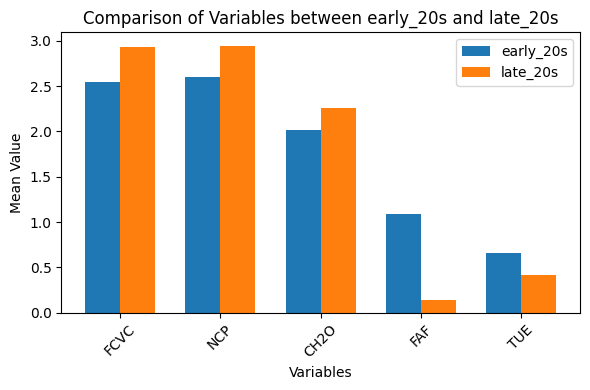

In [146]:
import numpy as np

# late_20s와 early_20s의 각 항목에 대한 평균 계산
late_20s_means = f_df[f_df['20_Age_Group']=='late_20s'][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()
early_20s_means = f_df[f_df['20_Age_Group']=='early_20s'][['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].mean()

# 항목들
categories = late_20s_means.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x, early_20s_means, width, label='early_20s')
plt.bar(x + width, late_20s_means, width, label='late_20s')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Comparison of Variables between early_20s and late_20s')
plt.xticks(x + width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


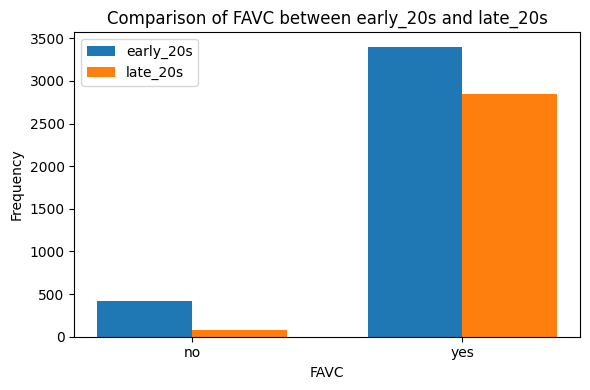

In [139]:
import numpy as np

# early_20s와 late_20s의 FAVC 항목에 대한 빈도 계산
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['FAVC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['FAVC'].value_counts().sort_index()

# 범주들
categories = early_20s_favc_freq.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('FAVC')
plt.ylabel('Frequency')
plt.title('Comparison of FAVC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


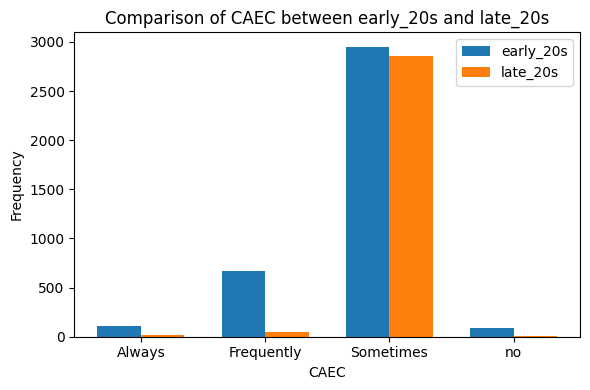

In [150]:
import numpy as np

# early_20s와 late_20s의 FAVC 항목에 대한 빈도 계산
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['CAEC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['CAEC'].value_counts().sort_index()

# 범주들
categories = early_20s_favc_freq.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('CAEC')
plt.ylabel('Frequency')
plt.title('Comparison of CAEC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


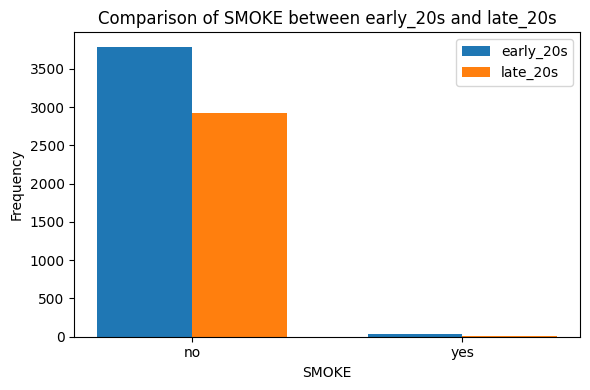

In [151]:
import numpy as np

# early_20s와 late_20s의 FAVC 항목에 대한 빈도 계산
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['SMOKE'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['SMOKE'].value_counts().sort_index()

# 범주들
categories = early_20s_favc_freq.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('SMOKE')
plt.ylabel('Frequency')
plt.title('Comparison of SMOKE between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


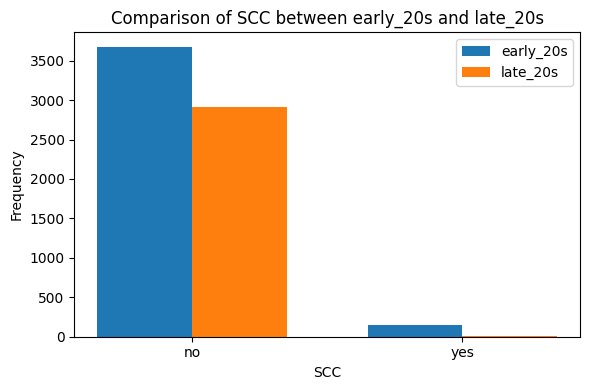

In [152]:
import numpy as np

# early_20s와 late_20s의 FAVC 항목에 대한 빈도 계산
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['SCC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['SCC'].value_counts().sort_index()

# 범주들
categories = early_20s_favc_freq.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('SCC')
plt.ylabel('Frequency')
plt.title('Comparison of SCC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


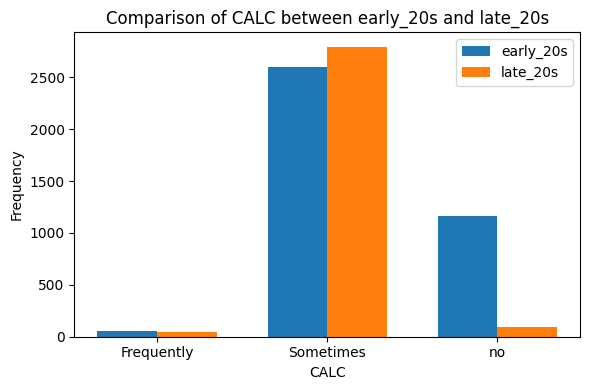

In [153]:
import numpy as np

# early_20s와 late_20s의 FAVC 항목에 대한 빈도 계산
early_20s_favc_freq = f_df[f_df['20_Age_Group']=='early_20s']['CALC'].value_counts().sort_index()
late_20s_favc_freq = f_df[f_df['20_Age_Group']=='late_20s']['CALC'].value_counts().sort_index()

# 범주들
categories = early_20s_favc_freq.index

# 막대의 위치 조정
x = np.arange(len(categories))

# 막대 그래프 그리기
width = 0.35  # 막대의 너비
plt.figure(figsize=(6, 4))
plt.bar(x - width/2, early_20s_favc_freq, width, label='early_20s')
plt.bar(x + width/2, late_20s_favc_freq, width, label='late_20s')
plt.xlabel('CALC')
plt.ylabel('Frequency')
plt.title('Comparison of CALC between early_20s and late_20s')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


### FAF 즉 활동빈도에 차이가 나니까 사용하는 교통수단에도 차이가 있나?
- 별 차이는 없다. 

In [156]:
f_df[f_df['20_Age_Group']=='early_20s']['MTRANS'].value_counts() / len(f_df[f_df['20_Age_Group']=='early_20s'])*100

MTRANS
Public_Transportation    95.705682
Automobile                2.697041
Walking                   1.335428
Bike                      0.130924
Motorbike                 0.130924
Name: count, dtype: float64

In [158]:
f_df[f_df['20_Age_Group']=='late_20s']['MTRANS'].value_counts() / len(f_df[f_df['20_Age_Group']=='late_20s'])*100

MTRANS
Public_Transportation    94.841134
Automobile                4.783054
Walking                   0.273317
Motorbike                 0.102494
Name: count, dtype: float64

## 결론
- 20대 후반 여성들은 활동량이 너무 적다. 
- 아마 대학을 졸업하고 일을 시작하면서 활동량이 줄어든 것 아닌가 싶다.
- 활동량을 채워줄 수 있는 시간이 필요하다. 